In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [56]:
%run livecricket_functions.py

In [3]:
#single processed file
processed_file = pd.read_csv('myfile.csv')
#processed_file = pd.read_excel('/home/arnab/Code/live_cricket_analysis/Suquoia_analysis/Control(CV)/D5-A_1_F-1DeepCut_resnet50_CVvsGFprojectJul16shuffle1_1030000-processed.xlsx')
#processed_file = pd.read_excel('/home/arnab/Code/live_cricket_analysis/Suquoia_analysis/Germ-free(GF)/D5-C_1_F-1DeepCut_resnet50_CVvsGFprojectJul16shuffle1_1030000-processed.xlsx')

In [4]:
processed_file

,Second,Frame,nosex,nosey,noselikelihood,noseFreeze,leftearx,lefteary,leftearlikelihood,leftearFreeze,...,rightearFreeze,tailbasex,tailbasey,tailbaselikelihood,tailbaseFreeze,stimx,stimy,stimlikelihood,stimFreeze,FullBodyFreeze
0,0.000000,0,27.497619,8.847001,1.0,0,27.405908,6.823524,1.0,0,...,0,24.493115,4.333865,0.999994,0,NaN,NaN,0.004451,0,0
1,0.033333,1,27.493756,8.846306,1.0,0,27.399385,6.825284,1.0,0,...,0,24.491511,4.337793,0.999994,0,NaN,NaN,0.004008,0,0
2,0.066667,2,27.523068,8.780606,1.0,1,27.373224,6.822655,1.0,1,...,1,24.494341,4.343025,0.999994,1,NaN,NaN,0.003759,0,1
3,0.100000,3,27.518792,8.771852,1.0,1,27.370281,6.829991,1.0,1,...,1,24.442062,4.325502,0.999995,1,NaN,NaN,0.003620,0,1
4,0.133333,4,27.502271,8.788379,1.0,1,27.384532,6.846642,1.0,1,...,1,24.434391,4.325764,0.999994,1,NaN,NaN,0.003243,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18065,602.166667,18065,80.272858,13.118503,1.0,0,79.774215,14.566622,1.0,0,...,0,81.215672,19.374677,1.000000,0,26.237368,63.771036,1.000000,1,0
18066,602.200000,18066,80.330879,12.852330,1.0,0,79.771394,14.358839,1.0,0,...,0,81.240980,19.205584,1.000000,0,26.239684,63.771187,1.000000,1,0
18067,602.233333,18067,80.393277,12.396724,1.0,0,79.870203,14.139786,1.0,0,...,0,81.237252,18.945174,1.000000,0,26.239780,63.770548,1.000000,1,0
18068,602.266667,18068,80.398429,11.777240,1.0,0,80.058140,13.814704,1.0,0,...,0,81.396092,18.678790,1.000000,0,26.238238,63.771666,1.000000,0,0


In [5]:
fps = 30
mouse_x, mouse_y = get_mouse_centroid(processed_file)
mouse_speed = get_mouse_speed(processed_file)
cricket_speed = get_cricket_speed(processed_file)
heading_cricket_mouse = get_mouse_heading_to_cricket(processed_file)
mouse_displacement = get_distance_travelled(processed_file)
distance_to_cricket = get_distance_to_cricket(processed_file)
print(f"mouse displacement: {mouse_displacement:.2f} cm in {len(processed_file)/fps:.2f} seconds")

# For each of the functions below you can pass a start and end frame to get the data for a specific part of the video
first_10seconds_start = 0
first_10seconds_end = 10*fps
mouse_displacement_10seconds = get_distance_travelled(processed_file,
                                                    first_10seconds_start,
                                                    first_10seconds_end)

print(f"mouse displacement in first 10 seconds: {mouse_displacement_10seconds:.2f} cm")

mouse displacement: 4184.71 cm in 602.33 seconds
mouse displacement in first 10 seconds: 12.51 cm


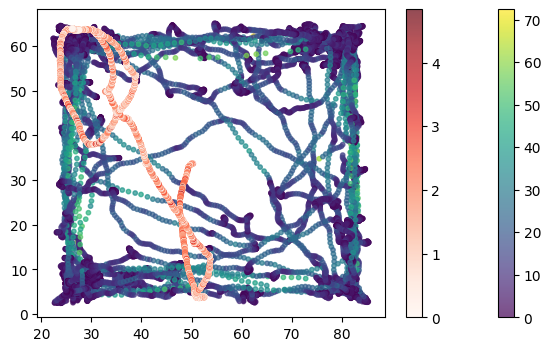

In [6]:
plt.figure(figsize = (7,4), dpi = 100)
plt.scatter(mouse_x,mouse_y, c = mouse_speed, alpha = 0.7, s = 10)
_= plt.colorbar()
plt.scatter(processed_file.stimx,processed_file.stimy, c = cricket_speed, alpha = 0.7, s = 10, cmap = 'Reds')
_ = plt.colorbar()

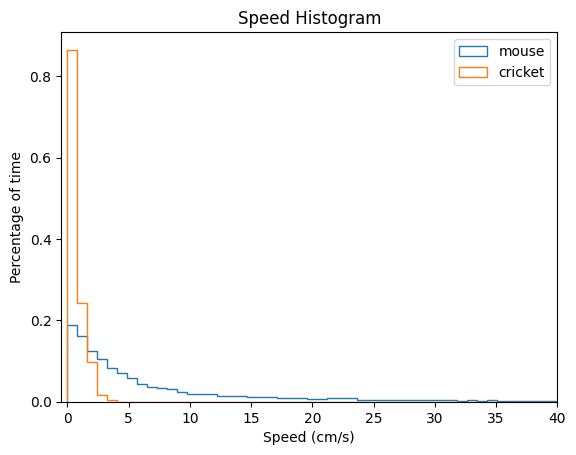

In [7]:
_ = plt.hist(mouse_speed, bins = np.linspace(0, 40, 50), histtype = 'step', label = 'mouse', density = True)
_ = plt.hist(cricket_speed, bins = np.linspace(0, 40, 50), histtype = 'step', label = 'cricket', density = True)
plt.xlim(-0.5, 40)
plt.legend()
plt.xlabel('Speed (cm/s)')
plt.ylabel('Percentage of time')
plt.title('Speed Histogram')
plt.show()

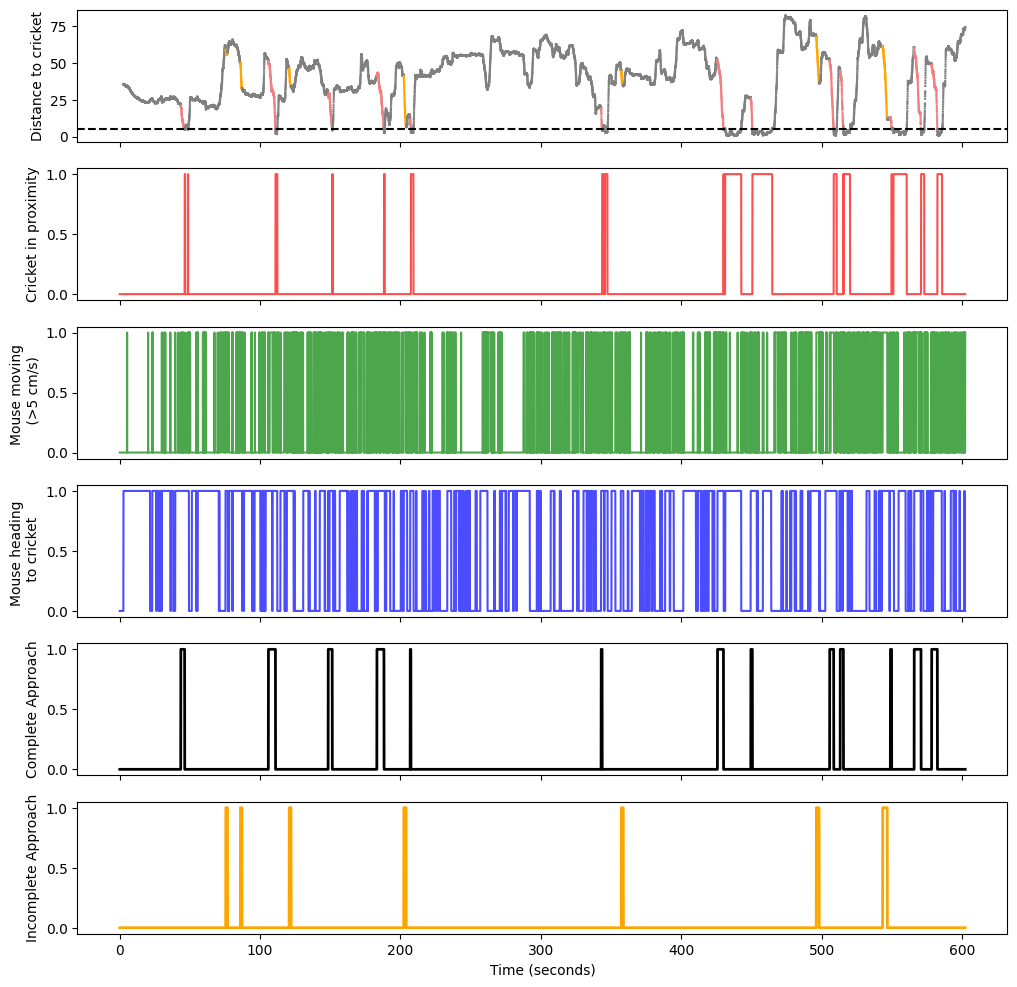

In [8]:
# Get approach events
approach_events, incomplete_approach_events = get_approach_events(distance_to_cricket,
                                                                mouse_speed,
                                                                heading_cricket_mouse,
                                                                processed_file, plot=True)

In [9]:
len(approach_events), len(incomplete_approach_events)

(13, 7)

In [10]:
print(approach_events)
# print(incomplete_approach_events)

[(1304, 1386), (3176, 3327), (4454, 4540), (5495, 5646), (6207, 6221), (10288, 10308), (12774, 12902), (13487, 13519), (15172, 15257), (15397, 15465), (16470, 16495), (16978, 17124), (17351, 17473)]


In [11]:
approach_heading = []
for start, end in approach_events:
    heading_cricket_mouse_approach = get_mouse_heading_to_cricket(processed_file, start, end)
    approach_heading.append(heading_cricket_mouse_approach)

incomplete_approach_heading = []
for start, end in incomplete_approach_events:
    heading_cricket_mouse_approach = get_mouse_heading_to_cricket(processed_file, start, end)
    incomplete_approach_heading.append(heading_cricket_mouse_approach)

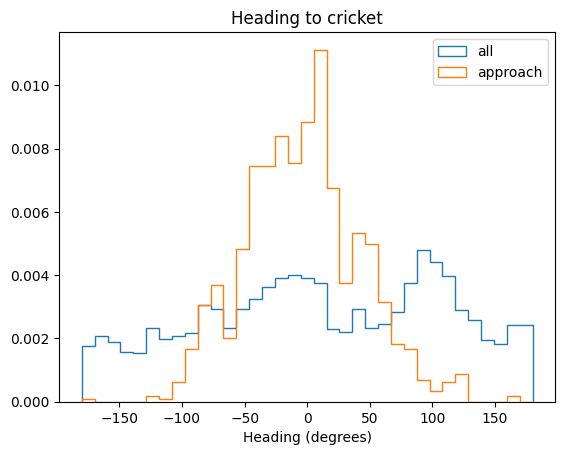

In [12]:
_= plt.hist(heading_cricket_mouse,
            bins = np.linspace(-180, 180, 36),
            histtype = 'step',density = True, label = 'all')
_ = plt.hist(np.concatenate(approach_heading),
            bins = np.linspace(-180, 180, 36),
            histtype = 'step',density = True, label = 'approach')
plt.xlabel('Heading (degrees)')
plt.title('Heading to cricket')
plt.legend()

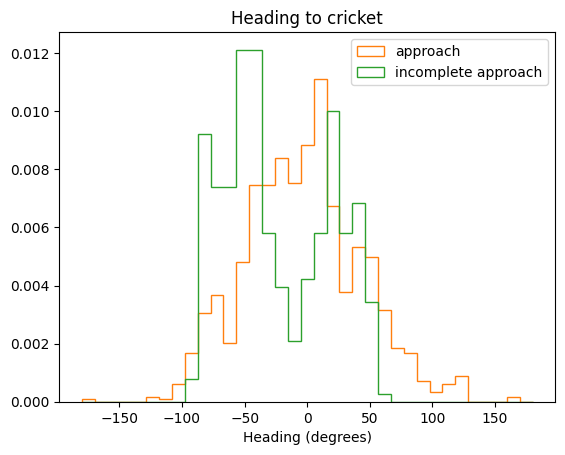

In [13]:
_ = plt.hist([])
_ = plt.hist(np.concatenate(approach_heading),
            bins = np.linspace(-180, 180, 36),
            histtype = 'step',density = True, label = 'approach')
_ = plt.hist(np.concatenate(incomplete_approach_heading),
            bins = np.linspace(-180, 180, 36),
            histtype = 'step',density = True, label = 'incomplete approach')
plt.legend()
plt.xlabel('Heading (degrees)')
plt.title('Heading to cricket')
plt.legend()

In [14]:
speed_trial = []
cricket_azimuth = []

for start, end in approach_events:
    speed_trial.append(mouse_speed[start:end])
    cricket_azimuth.append(heading_cricket_mouse[start:end])

padded_speed_trial = pad_sequences(speed_trial)
padded_cricket_azimuth = pad_sequences(cricket_azimuth)

In [15]:
len(padded_cricket_azimuth)

13

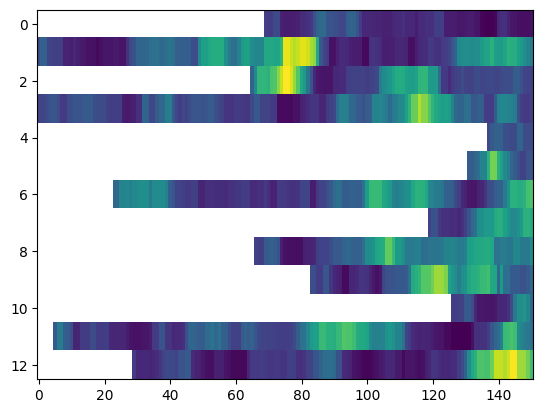

In [16]:
plt.imshow(padded_speed_trial, aspect = 'auto', interpolation = 'none')

/tmp/ipykernel_43321/764007153.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plt.gca().set_xticklabels([f'{tick:.1f}' for tick in np.flip(current_ticks)])


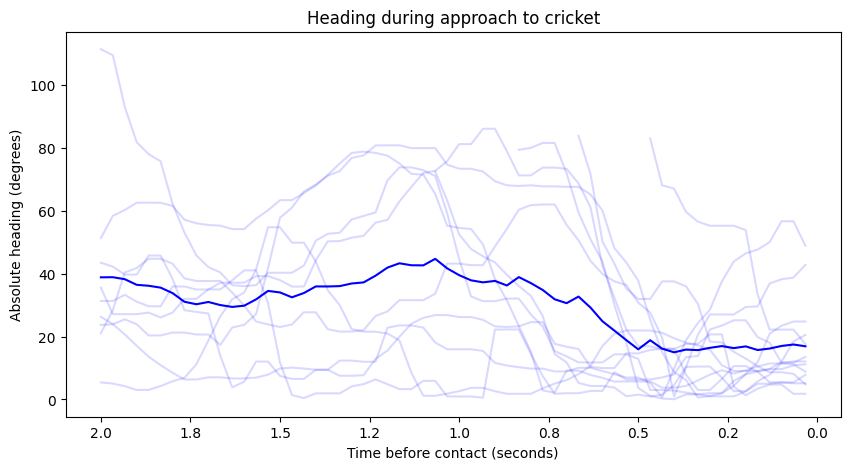

In [17]:
#plot the speed and azimuth
plt.figure(figsize=(10, 5))
# plt.plot(padded_speed_trial.T)
plt.plot(np.arange(len(padded_cricket_azimuth[0][-60:]))/30, np.abs(padded_cricket_azimuth[:,-60:]).T, color='blue', alpha=0.15)
plt.plot(np.arange(len(padded_cricket_azimuth[0][-60:]))/30, np.nanmean(np.abs(padded_cricket_azimuth[:,-60:]), axis=0), color='blue')
plt.ylabel('Absolute heading (degrees)')
plt.xlabel('Time before contact (seconds)')
plt.title('Heading during approach to cricket')
current_ticks = plt.gca().get_xticks()
_ = plt.gca().set_xticklabels([f'{tick:.1f}' for tick in np.flip(current_ticks)])
# plt.show()

/tmp/ipykernel_43321/2318982735.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plt.gca().set_xticklabels([f'{tick:.1f}' for tick in np.flip(current_ticks)])


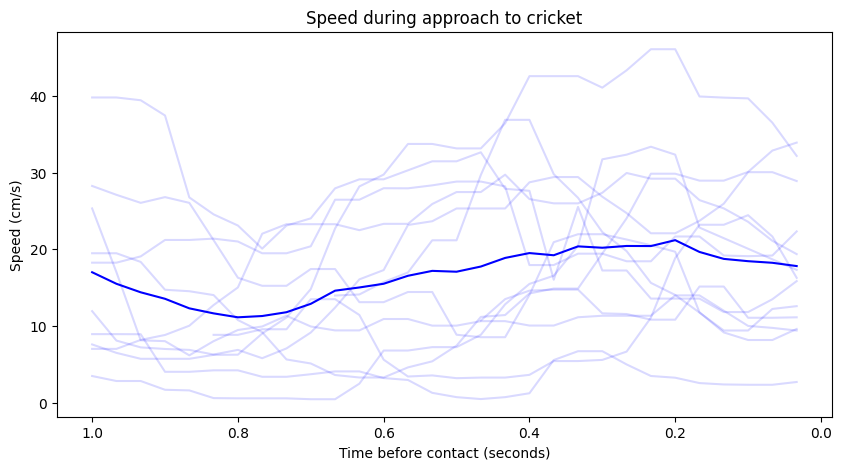

In [18]:
#plot the speed and azimuth
plt.figure(figsize=(10, 5))
# plt.plot(padded_speed_trial.T)
plt.plot(np.arange(len(padded_speed_trial[0][-30:]))/30, np.abs(padded_speed_trial[:,-30:]).T, color='blue', alpha=0.15)
plt.plot(np.arange(len(padded_speed_trial[0][-30:]))/30, np.nanmean(np.abs(padded_speed_trial[:,-30:]), axis=0), color='blue')
plt.ylabel('Speed (cm/s)')
plt.xlabel('Time before contact (seconds)')
plt.title('Speed during approach to cricket')
current_ticks = plt.gca().get_xticks()
_ = plt.gca().set_xticklabels([f'{tick:.1f}' for tick in np.flip(current_ticks)])
# plt.show()

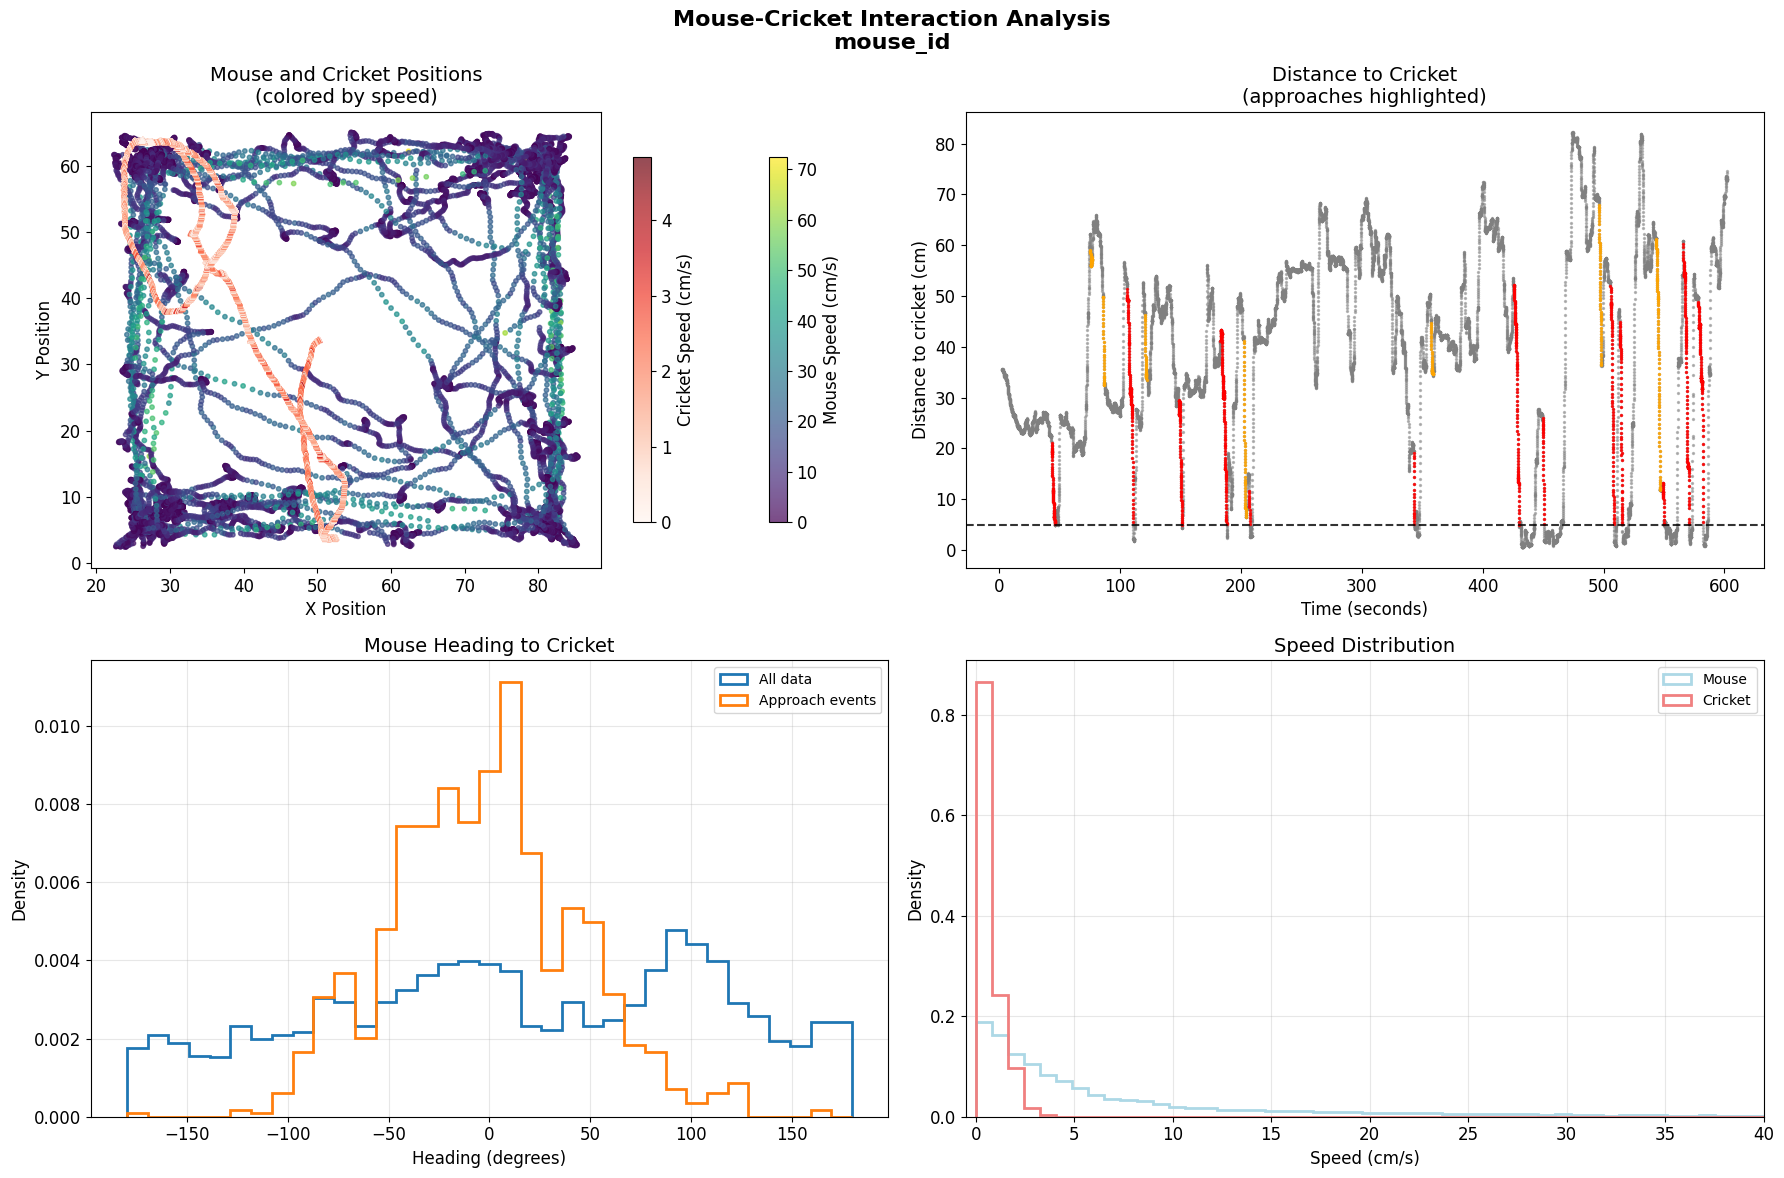

In [19]:
# Example usage:
fig = create_combined_analysis_plot(processed_file, mouse_x, mouse_y, mouse_speed, 
                                   cricket_speed, heading_cricket_mouse, distance_to_cricket, file_key = 'mouse_id')
plt.show()

In [20]:
GF_files = glob.glob('/home/arnab/Code/live_cricket_analysis/suquoia_data/GermFree(GF)GroupA/*.xlsx')
CV_files = glob.glob('/home/arnab/Code/live_cricket_analysis/suquoia_data/Control(CV)GroupC/*.xlsx')

In [21]:
for file in GF_files:
    group, day, mouse_id, sex, trial = parse_filename(file)
    if sex == 'M' and mouse_id == '1' and day == '1':
        print(f'group: {group}, day: {day}, mouse_id: {mouse_id}, sex: {sex}, trial: {trial}')
        print(file)
        print('--------------------------------')

group: A, day: 1, mouse_id: 1, sex: M, trial: 3
/home/arnab/Code/live_cricket_analysis/suquoia_data/GermFree(GF)GroupA/D1-A_1_M-3DeepCut_resnet50_CVvsGFprojectJul16shuffle1_1030000-processed.xlsx
--------------------------------
group: A, day: 1, mouse_id: 1, sex: M, trial: 1
/home/arnab/Code/live_cricket_analysis/suquoia_data/GermFree(GF)GroupA/D1-A_1_M-1DeepCut_resnet50_CVvsGFprojectJul16shuffle1_1030000-processed.xlsx
--------------------------------
group: A, day: 1, mouse_id: 1, sex: M, trial: 2
/home/arnab/Code/live_cricket_analysis/suquoia_data/GermFree(GF)GroupA/D1-A_1_M-2DeepCut_resnet50_CVvsGFprojectJul16shuffle1_1030000-processed.xlsx
--------------------------------


In [22]:
GF_data = process_gf_cv_mouse_experiment(GF_files)
CV_data = process_gf_cv_mouse_experiment(CV_files)

In [58]:
%run livecricket_functions.py

In [59]:
#Average across groups and days
GF_average_data = average_gf_cv_mouse_experiment_data(GF_data)
CV_average_data = average_gf_cv_mouse_experiment_data(CV_data)

/home/arnab/Code/live_cricket_analysis/livecricket_functions.py:761: RuntimeWarning: Mean of empty slice
  average_data[new_key][day]['average_speed_during_interception'].append(np.nanmean(sliding_avg))
/home/arnab/Code/live_cricket_analysis/livecricket_functions.py:762: RuntimeWarning: All-NaN slice encountered
  average_data[new_key][day]['max_speed_during_interception'].append(np.nanmax(sliding_avg))
/home/arnab/Code/live_cricket_analysis/livecricket_functions.py:799: RuntimeWarning: Mean of empty slice
  average_data[new_key]['all']['average_speed_during_interception'].append(np.nanmean(sliding_avg))
/home/arnab/Code/live_cricket_analysis/livecricket_functions.py:800: RuntimeWarning: All-NaN slice encountered
  average_data[new_key]['all']['max_speed_during_interception'].append(np.nanmax(sliding_avg))


In [24]:
#Plots I need to make
#- [x] Get approach start and end times
    #loop over all trials for a given day and for all days
    #- [ ] Cumulative speed 5 walking back from approach end + hist ?
    #- [ ] Same as above for approach start

    #- [x] Average and max speed during interception to -1 seconds across days
    #- [x] Time to capture across days - need to read csv file from Suquoia
    #- [x] Approach start distance to cricket across days
    #- [ ] Probability of capture across days
    #- [x] Distance travelled across days
    #- [x] Number of approach events per trial across days
    #- [x] Number of incomplete approches per trial across days
    #- [x] Smooth speed data
    #- [ ] PCA of speed data and non absolute heading data

In [25]:
GF_data.keys()

dict_keys(['A-1-M-1', 'A-2-M-1', 'A-2-F-5', 'A-2-M-2', 'A-1-M-3', 'A-1-M-6', 'A-2-F-2', 'A-1-F-4', 'A-1-F-1', 'A-1-F-2', 'A-2-M-3', 'A-2-M-4', 'A-2-F-3', 'A-1-M-2', 'A-2-M-7', 'A-2-M-5', 'A-1-F-3', 'A-2-F-4', 'A-1-M-5', 'A-2-F-1', 'A-1-F-7', 'A-1-F-5', 'A-2-M-6', 'A-1-M-4'])

In [26]:
day = 'all'
for key in GF_average_data.keys():
    try:
        print(f'{key} has {GF_average_data[key][day]["num_approach_events"]} approaches for day {day}')
    except:
        print(f'{key} has no data for day {day}')
for key in CV_average_data.keys():
    try:
        print(f'{key} has {CV_average_data[key][day]["num_approach_events"]} approaches for day {day}')
    except:
        print(f'{key} has no data for day {day}')

A-1-M has [10, 7, 3, 1, 16, 0, 2, 1, 1, 10, 12, 14, 9, 4, 4, 4, 8, 17] approaches for day all
A-2-M has [10, 14, 4, 7, 12, 4, 10, 2, 1, 9, 6, 9, 2, 1, 1, 0, 2, 3, 0, 2, 2] approaches for day all
A-2-F has [0, 5, 1, 4, 6, 7, 6, 2, 4, 2, 12, 10, 1, 3, 2] approaches for day all
A-1-F has [10, 0, 22, 7, 13, 10, 9, 13, 14, 13, 6, 5, 2, 2, 4, 2, 5, 7] approaches for day all
C-2-F has [9, 4, 2, 5, 3, 1, 2, 10, 14, 5, 3, 2, 10, 12, 6, 0, 3, 5, 5, 10, 7] approaches for day all
C-2-M has [4, 6, 10, 13, 6, 9, 2, 7, 19, 8, 9, 5, 3, 4, 5, 10, 0, 5, 10, 3, 14] approaches for day all
C-1-F has [2, 2, 8, 6, 5, 8, 0, 1, 0, 0, 1, 7, 6, 7, 6, 16, 1, 5, 1] approaches for day all
C-1-M has [5, 21, 11, 8, 13, 8, 5, 5, 5, 9, 7, 3, 20, 2, 2, 2, 1, 1, 0, 0, 0] approaches for day all


In [60]:
def extract_approach_data(average_data):
    approach_data = {}
    for key in average_data.keys():
        for day in average_data[key].keys():
            if day == 'all':
                continue
            if day not in approach_data:
                approach_data[day] = {}
                approach_data[day]['num_approach_events'] = []
                approach_data[day]['distance_travelled'] = []
                approach_data[day]['average_speed_during_interception'] = []
                approach_data[day]['max_speed_during_interception'] = []
                approach_data[day]['time_to_capture'] = []
                approach_data[day]['distance_to_cricket_at_approach_start'] = []
                approach_data[day]['num_incomplete_approach_events'] = []

            approach_data[day]['num_approach_events'].append(np.nanmean(average_data[key][day]['num_approach_events']))
            approach_data[day]['distance_travelled'].append(np.nanmean(average_data[key][day]['distance_travelled']))
            approach_data[day]['average_speed_during_interception'].append(np.nanmean(average_data[key][day]['average_speed_during_interception']))
            approach_data[day]['max_speed_during_interception'].append(np.nanmean(average_data[key][day]['max_speed_during_interception']))
            approach_data[day]['time_to_capture'].append(np.nanmean(average_data[key][day]['time_to_capture']))
            approach_data[day]['distance_to_cricket_at_approach_start'].append(np.nanmean(average_data[key][day]['distance_to_cricket_at_approach_start']))
            approach_data[day]['num_incomplete_approach_events'].append(np.nanmean(average_data[key][day]['num_incomplete_approach_events']))
    
    return approach_data

In [61]:
GF_approach_data = extract_approach_data(GF_average_data)
CV_approach_data = extract_approach_data(CV_average_data)


/tmp/ipykernel_43321/345345885.py:19: RuntimeWarning: Mean of empty slice
  approach_data[day]['average_speed_during_interception'].append(np.nanmean(average_data[key][day]['average_speed_during_interception']))
/tmp/ipykernel_43321/345345885.py:20: RuntimeWarning: Mean of empty slice
  approach_data[day]['max_speed_during_interception'].append(np.nanmean(average_data[key][day]['max_speed_during_interception']))
/tmp/ipykernel_43321/345345885.py:22: RuntimeWarning: Mean of empty slice
  approach_data[day]['distance_to_cricket_at_approach_start'].append(np.nanmean(average_data[key][day]['distance_to_cricket_at_approach_start']))


In [62]:
def plot_metric_across_days(approach_data_group1, approach_data_group2=None, metric_key=None, title=None, ylabel=None, ax=None, group1_name='Group 1', group2_name='Group 2', plot_type='both'):
    """
    Plot a specific metric across days with scatter plots and/or violin plots for individual values
    
    Parameters:
    approach_data_group1: dict - output from extract_approach_data function for first group
    approach_data_group2: dict - output from extract_approach_data function for second group (optional)
    metric_key: str - key for the metric to plot (e.g., 'num_approach_events')
    title: str - plot title (optional)
    ylabel: str - y-axis label (optional)
    ax: matplotlib axis - axis to plot on (optional, creates new figure if None)
    group1_name: str - name for first group in legend (default: 'Group 1')
    group2_name: str - name for second group in legend (default: 'Group 2')
    plot_type: str - 'scatter', 'violin', or 'both' (default: 'both')
    """
    # Get default matplotlib colors
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    if ax is None:
        plt.figure(figsize=(10, 6))
        ax = plt.gca()
    
    # Get days
    days = sorted([int(day) for day in approach_data_group1.keys() if day.isdigit()])
    
    # Prepare data for violin plots if needed
    if plot_type in ['violin', 'both']:
        all_data_group1 = []
        all_data_group2 = []
        valid_days = []
        
        for day in days:
            day_str = str(day)
            if day_str in approach_data_group1 and metric_key in approach_data_group1[day_str]:
                values1 = approach_data_group1[day_str][metric_key]
                # Remove NaN values
                values1 = [v for v in values1 if not np.isnan(v)]
                if values1:  # Only add if there are valid values
                    all_data_group1.append(values1)
                    valid_days.append(day)
                    
                    if approach_data_group2 is not None:
                        if day_str in approach_data_group2 and metric_key in approach_data_group2[day_str]:
                            values2 = approach_data_group2[day_str][metric_key]
                            values2 = [v for v in values2 if not np.isnan(v)]
                            all_data_group2.append(values2)
                        else:
                            all_data_group2.append([])
        
        # Create violin plots
        if all_data_group1:
            positions1 = [day - 0.2 for day in valid_days]
            violin_parts1 = ax.violinplot(all_data_group1, positions=positions1, widths=0.3, showmeans=False,
                                         side='low', showmedians=False, showextrema=False)
            
            # Color the violin plots
            for pc in violin_parts1['bodies']:
                pc.set_facecolor(colors[0])
                pc.set_alpha(0.3)
                pc.set_edgecolor('darkblue')
            
            if approach_data_group2 is not None and all_data_group2:
                # Filter out empty data for group 2
                valid_data_group2 = []
                valid_positions2 = []
                for i, data in enumerate(all_data_group2):
                    if data:  # Only include non-empty data
                        valid_data_group2.append(data)
                        valid_positions2.append(valid_days[i] + 0.2)
                
                if valid_data_group2:
                    violin_parts2 = ax.violinplot(valid_data_group2, positions=valid_positions2,
                                                   widths=0.3, showmeans=False,
                                                   showmedians=False,
                                                   showextrema=False,
                                                   side='high')
                    
                    # Color the violin plots
                    for pc in violin_parts2['bodies']:
                        pc.set_facecolor(colors[1])
                        pc.set_alpha(0.3)
                        pc.set_edgecolor('darkred')
    
    # Add scatter plots and means if needed
    if plot_type in ['scatter', 'both']:
        means1 = []
        sems1 = []
        
        for day in days:
            day_str = str(day)
            if day_str in approach_data_group1 and metric_key in approach_data_group1[day_str]:
                values = approach_data_group1[day_str][metric_key]
                means1.append(np.nanmean(values))
                sems1.append(np.nanstd(values) / np.sqrt(len(values)))
                
                # Add scatter plot for individual values with minimal jitter
                jitter = np.random.normal(0, 0.05, len(values))  # Small random jitter
                day_values = [day - 0.1] * len(values) + jitter
                ax.scatter(day_values, values, alpha=0.6, s=30, color=colors[0], edgecolors='darkblue', linewidth=0.5)
            else:
                means1.append(np.nan)
                sems1.append(np.nan)
        
        # Plot mean with error bars for group 1 (no line connecting points)
        ax.errorbar([d - 0.1 for d in days], means1, yerr=sems1, marker='o', capsize=5, capthick=2, color=colors[0], 
                    markersize=8, linewidth=2, linestyle='none', label=f'{group1_name}')
        
        # Plot second group if provided
        if approach_data_group2 is not None:
            days2 = sorted([int(day) for day in approach_data_group2.keys() if day.isdigit()])
            means2 = []
            sems2 = []
            
            for day in days2:
                day_str = str(day)
                if day_str in approach_data_group2 and metric_key in approach_data_group2[day_str]:
                    values = approach_data_group2[day_str][metric_key]
                    means2.append(np.nanmean(values))
                    sems2.append(np.nanstd(values) / np.sqrt(len(values)))
                    
                    # Add scatter plot for individual values with slight offset and minimal jitter
                    jitter = np.random.normal(0, 0.05, len(values))  # Small random jitter
                    day_values = [day + 0.1] * len(values) + jitter  # Small offset to avoid overlap
                    ax.scatter(day_values, values, alpha=0.6, s=30, color=colors[1], edgecolors='darkred', linewidth=0.5)
                else:
                    means2.append(np.nan)
                    sems2.append(np.nan)
            
            # Plot mean with error bars for group 2 (no line connecting points)
            ax.errorbar([d + 0.1 for d in days2], means2, yerr=sems2, marker='s', capsize=5, capthick=2, 
                        color=colors[1], markersize=8, linewidth=2, linestyle='none', label=f'{group2_name}')
    
    # Add legend entries for violin plots if they exist
    if plot_type in ['violin', 'both']:
        from matplotlib.patches import Patch
        legend_elements = ax.get_legend_handles_labels()
        if legend_elements[0]:  # If there are existing legend entries
            legend_elements[0].append(Patch(facecolor=colors[0], alpha=0.3, edgecolor='darkblue', label=f'{group1_name} Distribution'))
            if approach_data_group2 is not None:
                legend_elements[0].append(Patch(facecolor=colors[1], alpha=0.3, edgecolor='darkred', label=f'{group2_name} Distribution'))
        else:
            ax.plot([], [], color=colors[0], alpha=0.3, linewidth=10, label=f'{group1_name} Distribution')
            if approach_data_group2 is not None:
                ax.plot([], [], color=colors[1], alpha=0.3, linewidth=10, label=f'{group2_name} Distribution')
    
    ax.set_xlabel('Day')
    if ylabel:
        ax.set_ylabel(ylabel)
    else:
        ax.set_ylabel(metric_key.replace('_', ' ').title())
    
    if title:
        ax.set_title(title)
    else:
        ax.set_title(f'{metric_key.replace("_", " ").title()} Across Days')
    
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    if ax == plt.gca():
        plt.show()

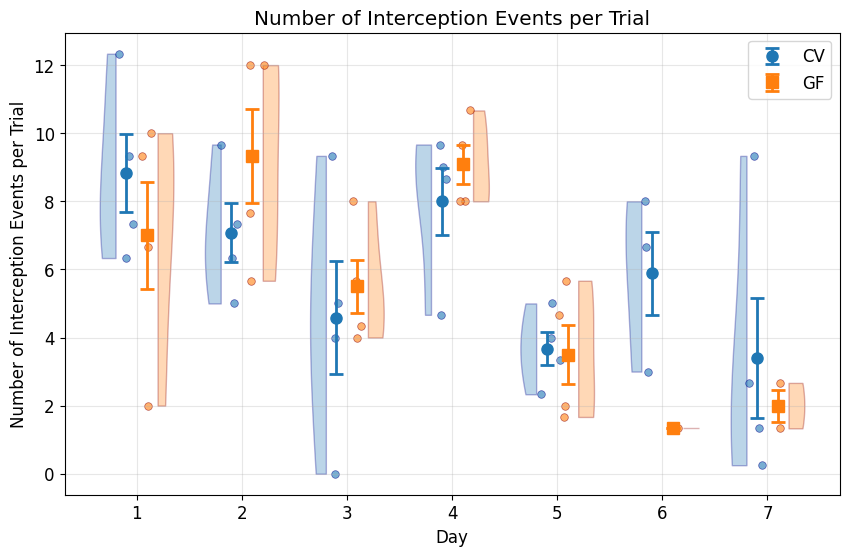

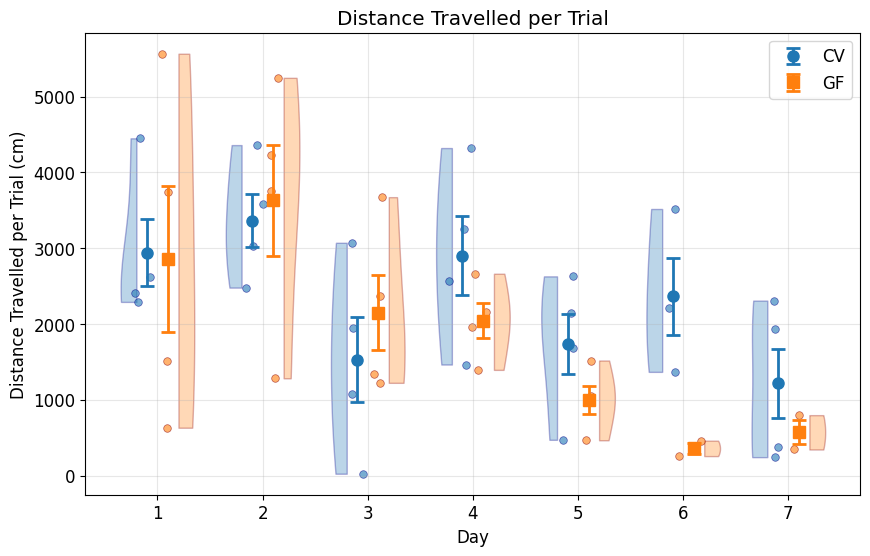

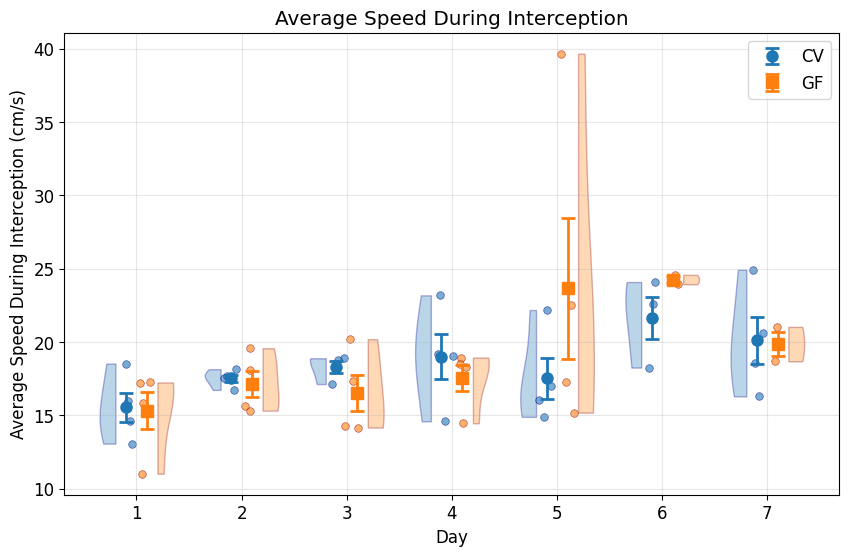

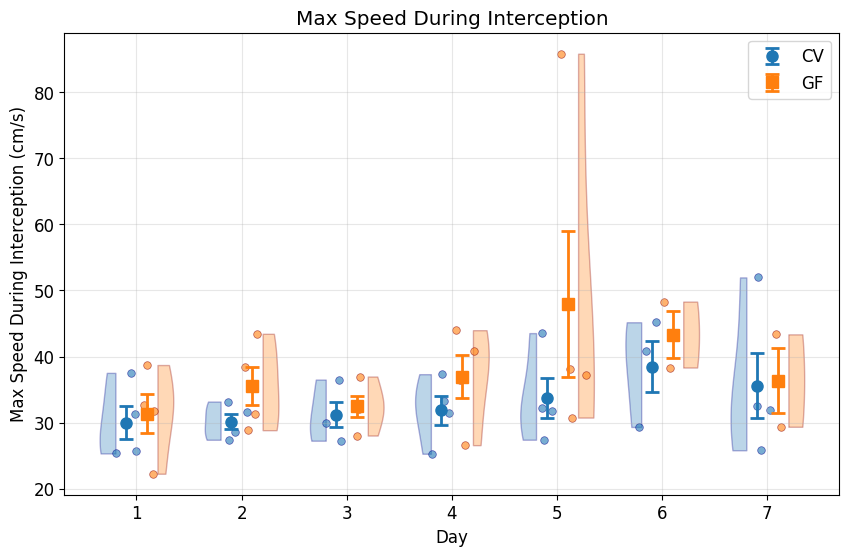

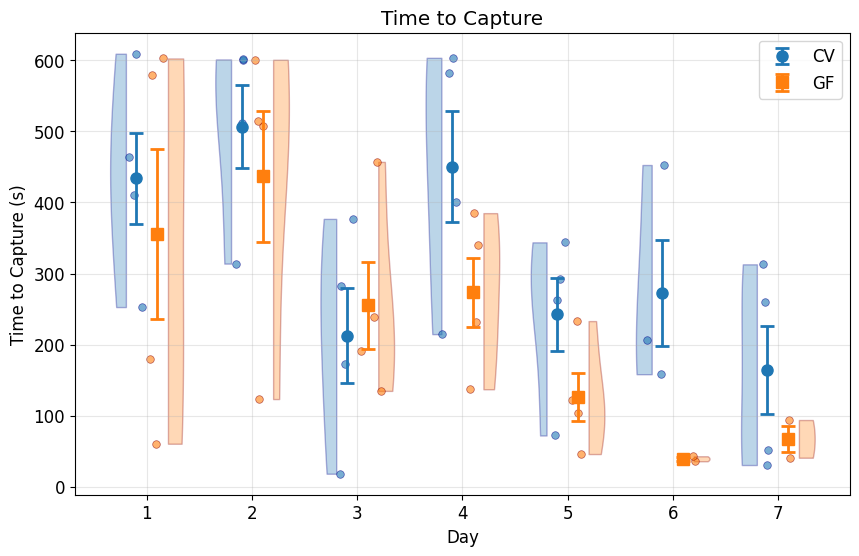

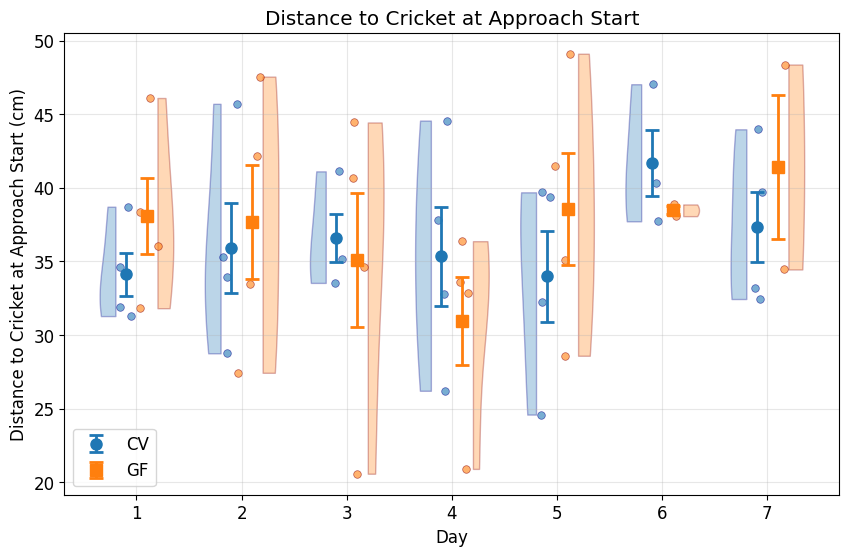

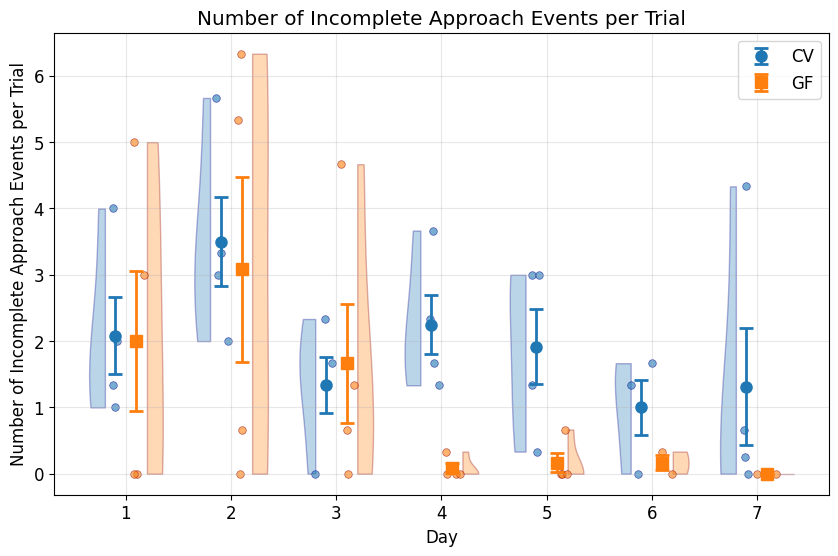

In [69]:
plot_metric_across_days(CV_approach_data,
                        GF_approach_data,
                        'num_approach_events',
                        title='Number of Interception Events per Trial',
                        ylabel='Number of Interception Events per Trial',
                        group1_name='CV',
                        group2_name='GF',
                        plot_type='both')

plot_metric_across_days(CV_approach_data,
                        GF_approach_data,
                        'distance_travelled',
                        title='Distance Travelled per Trial',
                        ylabel='Distance Travelled per Trial (cm)',
                        group1_name='CV',
                        group2_name='GF')

plot_metric_across_days(CV_approach_data,
                        GF_approach_data,
                        'average_speed_during_interception',
                        title='Average Speed During Interception',
                        ylabel='Average Speed During Interception (cm/s)',
                        group1_name='CV',
                        group2_name='GF')

plot_metric_across_days(CV_approach_data,
                        GF_approach_data,
                        'max_speed_during_interception',
                        title='Max Speed During Interception',
                        ylabel='Max Speed During Interception (cm/s)',
                        group1_name='CV',
                        group2_name='GF')

plot_metric_across_days(CV_approach_data,
                        GF_approach_data,
                        'time_to_capture',
                        title='Time to Capture',
                        ylabel='Time to Capture (s)',
                        group1_name='CV',
                        group2_name='GF')

plot_metric_across_days(CV_approach_data,
                        GF_approach_data,
                        'distance_to_cricket_at_approach_start',
                        title='Distance to Cricket at Approach Start',
                        ylabel='Distance to Cricket at Approach Start (cm)',
                        group1_name='CV',
                        group2_name='GF')
plot_metric_across_days(CV_approach_data,
                        GF_approach_data,
                        'num_incomplete_approach_events',
                        title='Number of Incomplete Approach Events per Trial',
                        ylabel='Number of Incomplete Approach Events per Trial',
                        group1_name='CV',
                        group2_name='GF')

In [68]:
GF_approach_data['1'][]

{'num_approach_events': [6.666666666666667, 9.333333333333334, 2.0, 10.0],
 'distance_travelled': [1508.527072916818,
  5566.398735604583,
  631.0297411644335,
  3741.7055860642936],
 'average_speed_during_interception': [17.234846932235925,
  15.81618813199322,
  11.011367417072021,
  17.17981341043464],
 'max_speed_during_interception': [38.71945792914376,
  31.83209872513003,
  22.28670877070582,
  32.66277130469447],
 'time_to_capture': [179.07777777777778,
  602.6555555555556,
  60.544444444444444,
  579.3111111111111],
 'distance_to_cricket_at_approach_start': [31.825648963652732,
  46.10347695603626,
  38.38919899268475,
  36.04632291307254],
 'num_incomplete_approach_events': [0.0, 3.0, 0.0, 5.0]}

In [76]:
print(len(GF_data['A-1-F-2']['approach_events'][0]))
# print(GF_data['A-1-F-1']['approach_events'])


9


In [77]:
GF_average_data['A-1-F']['2']['num_approach_events']

36

In [96]:
headings = np.stack(CV_average_data[key]['all']['heading_cricket_mouse+-5'])

In [98]:
headings.shape

(128, 300)

/tmp/ipykernel_43321/2845178080.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plt.gca().set_xticklabels([f'{tick:.1f}' for tick in current_ticks])


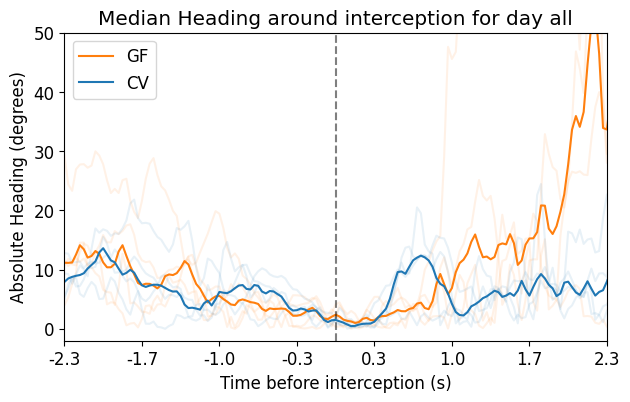

In [99]:
# Stack and average the heading data across all keys
GF_all_headings = []
CV_all_headings = []
day = 'all'

plt.figure(figsize=(7, 4), dpi=100)
for key in GF_average_data.keys():
    try:
        headings = np.stack(GF_average_data[key][day]['heading_cricket_mouse+-5'])
    except:
        print(f'{key} has no data for day {day}')
        continue
    avg_heading = np.nanmedian(headings, axis=0)
    # Apply sliding window average over two frames to individual traces
    avg_heading_filtered = np.array([(avg_heading[i] + avg_heading[i+1])/2 for i in range(len(avg_heading)-1)])
    plt.plot(np.abs(avg_heading_filtered), color = '#ff7f0e', alpha = 0.1)
    GF_all_headings.append(np.abs(avg_heading_filtered))

for key in CV_average_data.keys():
    try:
        headings = np.stack(CV_average_data[key][day]['heading_cricket_mouse+-5'])
    except:
        print(f'{key} has no data for day {day}')
        continue
    avg_heading = np.nanmedian(headings, axis=0)
    # Apply sliding window average over two frames to individual traces
    avg_heading_filtered = np.array([(avg_heading[i] + avg_heading[i+1])/2 for i in range(len(avg_heading)-1)])
    plt.plot(np.abs(avg_heading_filtered), color = '#1f77b4', alpha = 0.1)
    CV_all_headings.append(np.abs(avg_heading_filtered))

# Average across all keys
GF_overall_avg_heading = np.nanmedian(np.stack(GF_all_headings), axis=0)
CV_overall_avg_heading = np.nanmedian(np.stack(CV_all_headings), axis=0)

# Apply sliding window average over two frames
GF_filtered = np.array([(GF_overall_avg_heading[i] + GF_overall_avg_heading[i+1])/2 for i in range(len(GF_overall_avg_heading)-1)])
CV_filtered = np.array([(CV_overall_avg_heading[i] + CV_overall_avg_heading[i+1])/2 for i in range(len(CV_overall_avg_heading)-1)])

plt.plot(GF_filtered, color = '#ff7f0e', label = 'GF')
plt.plot(CV_filtered, color = '#1f77b4', label = 'CV')
plt.axvline(150, color = 'black', linestyle = '--', alpha = 0.5)
plt.ylim(-2, 50)
plt.xlim(80, 220)
plt.title(f'Median Heading around interception for day {day}')
plt.xlabel('Time before interception (s)')
plt.ylabel('Absolute Heading (degrees)')
current_ticks = plt.gca().get_xticks()
current_ticks = (current_ticks-150)/30
_ = plt.gca().set_xticklabels([f'{tick:.1f}' for tick in current_ticks])

plt.legend()
plt.show()

1
2
3
4


/tmp/ipykernel_43321/4156976429.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plt.gca().set_xticklabels([f'{tick:.1f}' for tick in current_ticks])


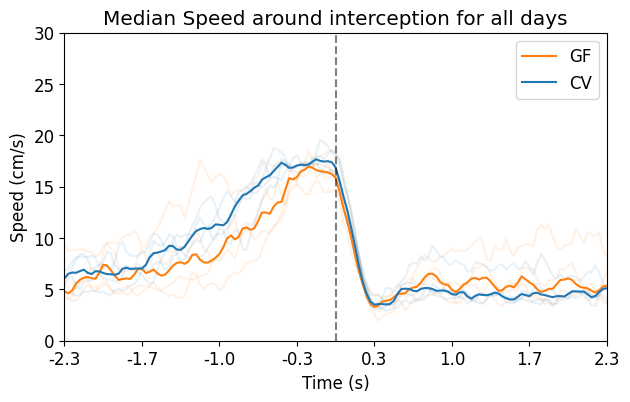

In [108]:
# Stack and average the heading data across all keys
GF_all_speeds = []
CV_all_speeds = []
day = 'all'
plt.figure(figsize=(7, 4), dpi=100)
for key in GF_average_data.keys():
    try:
        speeds = np.stack(GF_average_data[key][day]['mouse_speed+-5'])
    except:
        print(f'{key} has no data for day {day}')
        continue
    avg_speed = np.nanmedian(speeds, axis=0)
    # Apply sliding window average over two frames to individual traces
    avg_speed_filtered = np.array([(avg_speed[i] + avg_speed[i+1])/2 for i in range(len(avg_speed)-1)])
    plt.plot(avg_speed_filtered, color = '#ff7f0e', alpha = 0.1)
    GF_all_speeds.append(avg_speed_filtered)
    print(len(GF_all_speeds))

for key in CV_average_data.keys():
    try:
        speeds = np.stack(CV_average_data[key][day]['mouse_speed+-5'])
    except:
        print(f'{key} has no data for day {day}')
        continue
    avg_speed = np.nanmedian(speeds, axis=0)
    # Apply sliding window average over two frames to individual traces
    avg_speed_filtered = np.array([(avg_speed[i] + avg_speed[i+1])/2 for i in range(len(avg_speed)-1)])
    plt.plot(avg_speed_filtered, color = '#1f77b4', alpha = 0.1)
    CV_all_speeds.append(avg_speed_filtered)

# Average across all keys
GF_overall_avg_speed = np.nanmedian(np.stack(GF_all_speeds), axis=0)
CV_overall_avg_speed = np.nanmedian(np.stack(CV_all_speeds), axis=0)
# plt.plot(GF_overall_avg_speed, color = '#ff7f0e', label = 'GF')
# plt.plot(CV_overall_avg_speed, color = '#1f77b4', label = 'CV')

# Apply sliding window average over two frames
GF_filtered = np.array([(GF_overall_avg_speed[i] + GF_overall_avg_speed[i+1])/2 for i in range(len(GF_overall_avg_speed)-1)])
CV_filtered = np.array([(CV_overall_avg_speed[i] + CV_overall_avg_speed[i+1])/2 for i in range(len(CV_overall_avg_speed)-1)])

plt.plot(GF_filtered, color = '#ff7f0e', label = 'GF')
plt.plot(CV_filtered, color = '#1f77b4', label = 'CV')
plt.axvline(150, color = 'black', linestyle = '--', alpha = 0.5)
plt.xlim(80, 220)
plt.ylim(0, 30)
plt.title(f'Median Speed around interception for all days')
plt.xlabel('Time (s)')
plt.ylabel('Speed (cm/s)')
plt.legend()
current_ticks = plt.gca().get_xticks()
current_ticks = (current_ticks-150)/30
_ = plt.gca().set_xticklabels([f'{tick:.1f}' for tick in current_ticks])

plt.show()

In [17]:
# Find indices where full body freeze transitions from 1 to 0
transition_indices = np.where(np.diff(np.array(dataframe.FullBodyFreeze)) == -1)[0] + 1

array([  548,  3067,  3270,  3294,  4576,  4700,  4929,  5894,  7486,
        7518,  8106,  8483,  8522,  9389,  9493, 10059, 10086, 10289,
       10526, 10624, 10695, 12035, 12396, 12683, 12715, 12878, 12928,
       13222, 13404, 13669, 13833, 14402, 14623, 15364, 15914, 16692,
       16729, 17048, 17524, 17554])

In [18]:
fps = 30
n_post_freeze_seconds = 5
n_post_freeze_frames = n_post_freeze_seconds * fps

def compute_post_freeze_speeds(dataframe,
                            transition_indices,
                            fps=30,
                            n_post_freeze_seconds=5,
                            return_end_idx = False):
    #check heading
    n_post_freeze_frames = n_post_freeze_seconds * fps
    epoch_speeds = []
    if return_end_idx:
        end_idxs = []
    for i, transition_index in enumerate(transition_indices):

        end_index = min(transition_index + n_post_freeze_frames, len(dataframe))
        
        # Check for freeze periods
        freeze_indices = np.where(dataframe.FullBodyFreeze.iloc[transition_index:end_index] == 1)[0]
        if freeze_indices.size > 0:
            end_index = transition_index + freeze_indices[0]
        
        # Check if next transition is too close
        if i < len(transition_indices) - 1:
            next_transition_index = transition_indices[i + 1]
            if next_transition_index - end_index < n_post_freeze_frames:
                end_index = next_transition_index
        
        epoch_speeds.append(get_speed(dataframe, transition_index, end_index))
        if return_end_idx:
            end_idxs.append(end_index)
    if return_end_idx:
        return epoch_speeds, end_idxs
    else:
        return epoch_speeds


In [43]:
from glob import glob
group_1_files = glob('./Control(CV)/*.xlsx')
group_2_files = glob('./Germ-free(GF)/*.xlsx')

In [23]:
transition_indices = np.where(np.diff(dataframe.FullBodyFreeze) == -1)[0] + 1
speeds = compute_post_freeze_speeds(dataframe, transition_indices, fps=30, n_post_freeze_seconds=5)
    

In [24]:
len(group_1_files)

83

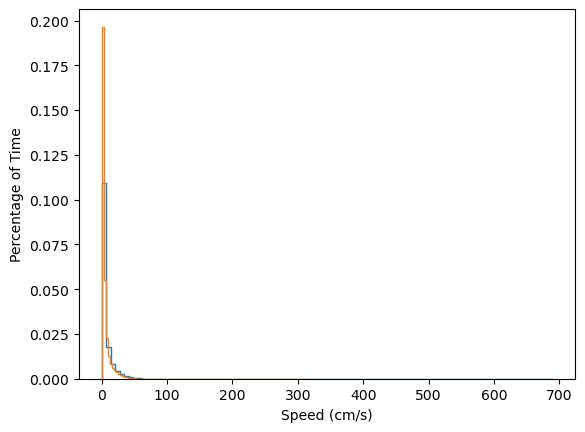

In [26]:
group_1_speeds = []
group_2_speeds = []
group_1_headings = []
group_1_cricket_azimuths = []
group_2_headings = []
group_2_cricket_azimuths = []
for file in group_1_files:
    dataframe = pd.read_excel(file)
    transition_indices = np.where(np.diff(dataframe.FullBodyFreeze) == -1)[0] + 1
    speeds = compute_post_freeze_speeds(dataframe, transition_indices, fps=30, n_post_freeze_seconds=5)
    group_1_speeds.extend(speeds)
    for i in range(len(transition_indices)):
        heading, cricket_azimuth = get_mouse_heading(dataframe, (transition_indices[i], return_cricket_azimuth=True)
        group_1_headings.append(heading)
        group_1_cricket_azimuths.append(cricket_azimuth)
for file in group_2_files:
    dataframe = pd.read_excel(file)
    transition_indices = np.where(np.diff(dataframe.FullBodyFreeze) == -1)[0] + 1
    speeds = compute_post_freeze_speeds(dataframe, transition_indices, fps=30, n_post_freeze_seconds=5)
    group_2_speeds.extend(speeds)

In [41]:
def pad_speed_sequences(speed_sequences):
    # Find max length of sequences
    max_len = max(len(seq) for seq in speed_sequences)

    # Create padded array with nans
    padded_speeds = np.array([np.pad(seq, (0, max_len - len(seq)),
                                    constant_values=np.nan)
                             for seq in speed_sequences])
    return padded_speeds

In [76]:
padded_speeds_1 = pad_speed_sequences(group_1_speeds)
padded_speeds_2 = pad_speed_sequences(group_2_speeds)
mean_1 = np.nanmean(padded_speeds_1, axis=0)
mean_2 = np.nanmean(padded_speeds_2, axis=0)

# confidence_level = 0.95  # 95% confidence interval
# n1 = np.sum(~np.isnan(padded_speeds_1), axis=0)  # number of non-nan values at each timepoint
# n2 = np.sum(~np.isnan(padded_speeds_2), axis=0)
# sem_1 = np.nanstd(padded_speeds_1, axis=0) / np.sqrt(n1)
# sem_2 = np.nanstd(padded_speeds_2, axis=0) / np.sqrt(n2)
# ci_1 = sem_1 * stats.t.ppf((1 + confidence_level) / 2, n1 - 1)
# ci_2 = sem_2 * stats.t.ppf((1 + confidence_level) / 2, n2 - 1)

plt.plot(mean_1)
# plt.fill_between(range(len(mean_1)), mean_1-ci_1, mean_1+ci_1, alpha=0.3)
plt.plot(mean_2)
# plt.fill_between(range(len(mean_2)), mean_2-ci_2, mean_2+ci_2, alpha=0.3)
# plt.legend()

NameError: name 'pad_speed_sequences' is not defined

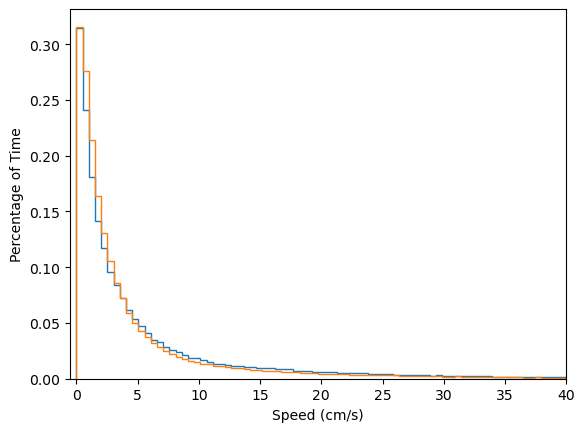

In [28]:
plt.hist(np.concatenate(group_1_speeds), bins=np.linspace(0, 40, 80), density=True, histtype='step')
plt.hist(np.concatenate(group_2_speeds), bins=np.linspace(0, 40, 80), density=True, histtype='step')
plt.xlim(-0.5, 40)
plt.ylabel('Percentage of Time')
plt.xlabel('Speed (cm/s)')
plt.show()

In [ ]:
#Video with labels in top right corner for approach, speed (changes color)
# heading and arrow
# Centroid with alpha dots history for 4 seconds
# Cricket trajectory - alpha dot